In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Portugal'

link = 'https://rally-base.com/2023/rally-serras-de-fafe-2023/?ssId='
startat, no_ss=7356, int(17) # starting number of url, count of Special Stages
canceled = [5, 8, 9]

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,34,Teodósio,RC2,00:01:27.9,58.57 0.00,00:00:00.0 00:00:00.0,1,Portugal,1
2,2,20,Cais Erik,RC2,00:01:28.1,58.43 0.14,00:00:00.2 00:00:00.2,1,Portugal,2
3,3,29,Marczyk M,RC2,00:01:29.2,57.71 0.91,00:00:01.3 00:00:01.1,1,Portugal,3
4,4,2,Paddon Ha,RC2,00:01:29.5,57.52 1.12,00:00:01.6 00:00:00.3,1,Portugal,4
5,4,8,Tempestini,RC2,00:01:29.5,57.52 1.12,00:00:01.6 00:00:00.0,1,Portugal,5
...,...,...,...,...,...,...,...,...,...,...
36,36,41,Jocz Tymo,RC4,00:11:38.9,76.74 9.12,00:02:15.8 00:00:20.1,17,Portugal,36
37,37,55,Muñoz Pat,RC4,00:11:39.9,76.63 9.19,00:02:16.8 00:00:01.0,17,Portugal,37
38,38,53,Strabello,RC4,00:11:42.3,76.37 9.35,00:02:19.2 00:00:02.4,17,Portugal,38
39,39,44,Kreuter N,RC4,00:11:50.0,75.55 9.86,00:02:26.9 00:00:07.7,17,Portugal,39


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:

rally2023_ClassView2

0                             Pos.                                          \
ss                              1   2   3   4   6   7   10  11  12  13  14   
No. Crew       Group Race                                                    
1   Llarena  E RC2   Portugal   20  15  15  16  14   7  13  10  12  18   9   
2   Paddon  Ha RC2   Portugal    4   3   3   7   3   2   1   4   3   2   2   
3   Breen  Cra RC2   Portugal    9  20   1   2   1  44   3   1   1   1  11   
4   Kristensso RC2   Portugal    7   9  12  18  36   7   8   9   2  15  10   
5   Østberg  M RC2   Portugal   22   1   5   1   5   3   9   7  14   3   3   
7   Bonato  Yo RC2   Portugal   26  14  14  15  11   7  12   4   8  17   8   
8   Tempestini RC2   Portugal    4  16  13  28  17   7   5  14   7   4  12   
9   Campedelli RC2   Portugal   25   6  48  11  20   7  15  19  16  10  13   
10  Battistoll RC2   Portugal   13  22  23  30  21   7   -   -   -   -   -   
11  Wagner  Si RC2   Portugal   16  12  20  26  24   7  20  24  26  25  21   
12  Araújo  Ar RC2   Portugal   17  12   9  10   6   -   -   -   -   -   -   
14  Fontes  J. RC2   Portugal   35  41  32  36  28   7  28  15  21  22  19   
15  Sesks  M.  RC2   Portugal   28   2  11   6  12   4   2  49   9   5   1   
16  Mareš  Fil RC2   Portugal    6  37  50  48  48  45  25  17  19  19  43   
17  Jeets  Gre RC2   Portugal   38  19  50  48  48  45  32  20  27  29  25   
18  McErlean   RC2   Portugal   22  28  16  19   8  43  18  15  13  29  16   
19  Franceschi RC2   Portugal   20  23   8   9  10  37   7  12  18  10  14   
20  Cais  Erik RC2   Portugal    2   7  10  14   9   7  17  37   -   -   -   
21  O'Brien  P RC2   Portugal   31  25  27  29  29   7  30  25  29  27  27   
22  Allen  Phi RC2   Portugal   28  48  53  48  48  45  49  31  33  29  30   
23  Cuzma  Bog RC2   Portugal   43  40  36  35  38   7  38  36  38  29  31   
24  Linnamäe   RC2   Portugal   13  10   4   4   4   6  11   8   9   9   6   
25  Virves  Ro RC2   Portugal   28   8  46  12  13   7  10   3   5   6   7   
26  Somaschini RC2   Portugal   40  43  38  39  39   7  39  39  41  29  42   
27  Correia  M RC2   Portugal   32  26  21  22  23   7  23  18  21  24  15   
28  Nucita  An RC2   Portugal   24  35  28  17  30   7  33  21  28  23   -   
29  Marczyk  M RC2   Portugal    3  24   7   5  15   5   5   6   4  12  20   
30  László  Ma RC2   Portugal   34  27  31  34  34   7  36  34  31   -   -   
31  Csomós  Mi RC2   Portugal   12  30   6   8   7  34  14  35  15   7   5   
32  Zaldivar   RC2   Portugal   10  11  19  21  19   7  23  13   6  13   -   
33  Tidemand   RC2   Portugal   13   5  22  13  16   7  19  26  23  16  22   
34  Teodósio   RC2   Portugal    1  33  24  31  25   7  15  41  24  21  17   
35  Sousa  Ber RC2   Portugal   17  29  17  24  35  45  26  28   -   -   -   
36  Mabellini  RC2   Portugal   26  17  18  20  18   7  21  11  17   8  32   
37  Meireles   RC2   Portugal   17  31  50  48  48  45   -   -   -  29   -   
38  Heikkilä   RC2   Portugal    7   4   2   3   2   1   4   2  11  14   3   
39  Simões  Lu RC2   Portugal   36  36  33  32  33   7  34  27  32  29  28   
45  Margaillan RC2   Portugal   32  32  25  23  22   7  21  22  20  20  18   
46  Almeida  P RC2   Portugal   11  34  29  33  31   7  29  29  30  29  26   
47  Kołtun  J. RC2   Portugal   42  39  34  38  32   7  37  33  35  29   -   
49  Neto  Paul RC2   Portugal   37  38  35  37  37   7  35  32  36  29  29   
50  Villanueva RC2   Portugal   39  21  30  27  27   7  31  30  34  28  24   
51  Caldeira   RC2   Portugal   44  51  42  47  46   7  47  42  43  29  38   

0                                          
ss                             15  16  17  
No. Crew       Group Race                  
1   Llarena  E RC2   Portugal   9  15  10  
2   Paddon  Ha RC2   Portugal   2   4   2  
3   Breen  Cra RC2   Portugal   7   2   1  
4   Kristensso RC2   Portugal  12  12   9  
5   Østberg  M RC2   Portugal   8   8   6  
7   Bonato  Yo RC2   Portugal  10   9  13  
8   Tempestini 

In [8]:
rally2023_ClassView

0                             Pos.                                          \
ss                              1   2   3   4   6   7   10  11  12  13  14   
No. Crew       Group Race                                                    
1   Llarena  E RC2   Portugal   20  15  15  16  14   7  13  10  12  18   9   
2   Paddon  Ha RC2   Portugal    4   3   3   7   3   2   1   4   3   2   2   
3   Breen  Cra RC2   Portugal    9  20   1   2   1  44   3   1   1   1  11   
4   Kristensso RC2   Portugal    7   9  12  18  36   7   8   9   2  15  10   
5   Østberg  M RC2   Portugal   22   1   5   1   5   3   9   7  14   3   3   
6   Ragues  Pi RC3   Portugal   41  44  37  40  40  35  41  38  40  29  33   
7   Bonato  Yo RC2   Portugal   26  14  14  15  11   7  12   4   8  17   8   
8   Tempestini RC2   Portugal    4  16  13  28  17   7   5  14   7   4  12   
9   Campedelli RC2   Portugal   25   6  48  11  20   7  15  19  16  10  13   
10  Battistoll RC2   Portugal   13  22  23  30  21   7   -   -   -   -   -   
11  Wagner  Si RC2   Portugal   16  12  20  26  24   7  20  24  26  25  21   
12  Araújo  Ar RC2   Portugal   17  12   9  10   6   -   -   -   -   -   -   
14  Fontes  J. RC2   Portugal   35  41  32  36  28   7  28  15  21  22  19   
15  Sesks  M.  RC2   Portugal   28   2  11   6  12   4   2  49   9   5   1   
16  Mareš  Fil RC2   Portugal    6  37  50  48  48  45  25  17  19  19  43   
17  Jeets  Gre RC2   Portugal   38  19  50  48  48  45  32  20  27  29  25   
18  McErlean   RC2   Portugal   22  28  16  19   8  43  18  15  13  29  16   
19  Franceschi RC2   Portugal   20  23   8   9  10  37   7  12  18  10  14   
20  Cais  Erik RC2   Portugal    2   7  10  14   9   7  17  37   -   -   -   
21  O'Brien  P RC2   Portugal   31  25  27  29  29   7  30  25  29  27  27   
22  Allen  Phi RC2   Portugal   28  48  53  48  48  45  49  31  33  29  30   
23  Cuzma  Bog RC2   Portugal   43  40  36  35  38   7  38  36  38  29  31   
24  Linnamäe   RC2   Portugal   13  10   4   4   4   6  11   8   9   9   6   
25  Virves  Ro RC2   Portugal   28   8  46  12  13   7  10   3   5   6   7   
26  Somaschini RC2   Portugal   40  43  38  39  39   7  39  39  41  29  42   
27  Correia  M RC2   Portugal   32  26  21  22  23   7  23  18  21  24  15   
28  Nucita  An RC2   Portugal   24  35  28  17  30   7  33  21  28  23   -   
29  Marczyk  M RC2   Portugal    3  24   7   5  15   5   5   6   4  12  20   
30  László  Ma RC2   Portugal   34  27  31  34  34   7  36  34  31   -   -   
31  Csomós  Mi RC2   Portugal   12  30   6   8   7  34  14  35  15   7   5   
32  Zaldivar   RC2   Portugal   10  11  19  21  19   7  23  13   6  13   -   
33  Tidemand   RC2   Portugal   13   5  22  13  16   7  19  26  23  16  22   
34  Teodósio   RC2   Portugal    1  33  24  31  25   7  15  41  24  21  17   
35  Sousa  Ber RC2   Portugal   17  29  17  24  35  45  26  28   -   -   -   
36  Mabellini  RC2   Portugal   26  17  18  20  18   7  21  11  17   8  32   
37  Meireles   RC2   Portugal   17  31  50  48  48  45   -   -   -  29   -   
38  Heikkilä   RC2   Portugal    7   4   2   3   2   1   4   2  11  14   3   
39  Simões  Lu RC2   Portugal   36  36  33  32  33   7  34  27  32  29  28   
40  Armstrong  RC3   Portugal   44  17  26  25  26  35  27  22  25  26  23   
41  Jocz  Tymo RC4   Portugal   50  46  41  42  44  50  44  44  42  29  37   
42  Daprà  Rob RC4   Portugal   46  47  39  44  43  38  42  43  37  29  35   
43  Mesquita   RC4   Portugal   49  53  45  46  45  38   -   -   -  29   -   
44  Kreuter  N RC4   Portugal   51  52  47  52  52  50  48  47  47  29  41   
45  Margaillan RC2   Portugal   32  32  25  23  22   7  21  22  20  20  18   
46  Almeida  P RC2   Portugal   11  34  29  33  31   7  29  29  30  29  26   
47  Kołtun  J. RC2   Portugal   42  39  34  38  32   7  37  33  35  29   -   
49  Neto  Paul RC2   Portugal   37  38  35  37  37   7  35  32  36  29  29   
50  Villanueva RC2   Portugal   39  21  30  27  27   7  31  30  34  28  24   
51  Caldeira   RC2   P

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,34,Teodósio,RC2,1,Portugal,1,87.9
2,20,Cais Erik,RC2,1,Portugal,2,88.1
3,29,Marczyk M,RC2,1,Portugal,3,89.2
4,2,Paddon Ha,RC2,1,Portugal,4,89.5
5,8,Tempestini,RC2,1,Portugal,5,89.5
...,...,...,...,...,...,...,...
36,41,Jocz Tymo,RC4,17,Portugal,36,698.9
37,55,Muñoz Pat,RC4,17,Portugal,37,699.9
38,53,Strabello,RC4,17,Portugal,38,702.3
39,44,Kreuter N,RC4,17,Portugal,39,710.0


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race     ss          
Portugal 1       87.9
         2      445.8
         3      676.4
         4      425.3
         6      427.3
         7      681.9
         10     330.1
         11     407.5
         12     371.6
         13     576.8
         14     326.3
         15     396.3
         16     368.5
         17     563.1

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,34,Teodósio,RC2,1,Portugal,1,87.9,87.9
1,20,Cais Erik,RC2,1,Portugal,2,88.1,87.9
2,29,Marczyk M,RC2,1,Portugal,3,89.2,87.9
3,2,Paddon Ha,RC2,1,Portugal,4,89.5,87.9
4,8,Tempestini,RC2,1,Portugal,5,89.5,87.9
...,...,...,...,...,...,...,...,...
671,41,Jocz Tymo,RC4,17,Portugal,36,698.9,563.1
672,55,Muñoz Pat,RC4,17,Portugal,37,699.9,563.1
673,53,Strabello,RC4,17,Portugal,38,702.3,563.1
674,44,Kreuter N,RC4,17,Portugal,39,710.0,563.1


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,34,Teodósio,RC2,1,Portugal,1,87.9,87.9,0.0,0.000000,01
1,20,Cais Erik,RC2,1,Portugal,2,88.1,87.9,0.2,0.227531,01
2,29,Marczyk M,RC2,1,Portugal,3,89.2,87.9,1.3,1.478953,01
3,2,Paddon Ha,RC2,1,Portugal,4,89.5,87.9,1.6,1.820250,01
4,8,Tempestini,RC2,1,Portugal,5,89.5,87.9,1.6,1.820250,01
...,...,...,...,...,...,...,...,...,...,...,...
671,41,Jocz Tymo,RC4,17,Portugal,36,698.9,563.1,135.8,24.116498,17
672,55,Muñoz Pat,RC4,17,Portugal,37,699.9,563.1,136.8,24.294086,17
673,53,Strabello,RC4,17,Portugal,38,702.3,563.1,139.2,24.720298,17
674,44,Kreuter N,RC4,17,Portugal,39,710.0,563.1,146.9,26.087729,17


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,34,Teodósio,RC2,1,Portugal,1,87.9,87.9,0.0,0.000000,01
1,20,Cais Erik,RC2,1,Portugal,2,88.1,87.9,0.2,0.227531,01
2,29,Marczyk M,RC2,1,Portugal,3,89.2,87.9,1.3,1.478953,01
3,2,Paddon Ha,RC2,1,Portugal,4,89.5,87.9,1.6,1.820250,01
4,8,Tempestini,RC2,1,Portugal,5,89.5,87.9,1.6,1.820250,01
...,...,...,...,...,...,...,...,...,...,...,...
664,34,Teodósio,RC2,17,Portugal,29,625.1,563.1,62.0,11.010478,17
665,23,Cuzma Bog,RC2,17,Portugal,30,637.0,563.1,73.9,13.123779,17
669,26,Somaschini,RC2,17,Portugal,34,662.2,563.1,99.1,17.599006,17
670,51,Caldeira,RC2,17,Portugal,35,678.8,563.1,115.7,20.546972,17


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,34,Teodósio,RC2,1,Portugal,1,87.9,87.9,0.0,0.000000,01
1,20,Cais Erik,RC2,1,Portugal,2,88.1,87.9,0.2,0.227531,01
2,29,Marczyk M,RC2,1,Portugal,3,89.2,87.9,1.3,1.478953,01
3,2,Paddon Ha,RC2,1,Portugal,4,89.5,87.9,1.6,1.820250,01
4,8,Tempestini,RC2,1,Portugal,5,89.5,87.9,1.6,1.820250,01
...,...,...,...,...,...,...,...,...,...,...,...
664,34,Teodósio,RC2,17,Portugal,29,625.1,563.1,62.0,11.010478,17
665,23,Cuzma Bog,RC2,17,Portugal,30,637.0,563.1,73.9,13.123779,17
669,26,Somaschini,RC2,17,Portugal,34,662.2,563.1,99.1,17.599006,17
670,51,Caldeira,RC2,17,Portugal,35,678.8,563.1,115.7,20.546972,17


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Portugal                                                          \
SS.              01     02      03     04     06     07     10     11    12   
Crew                                                                          
Allen  Phi      4.1   85.2  2094.9  600.0  600.0  600.0  124.4   40.3  31.9   
Almeida  P      2.4   28.4    60.6   81.9   47.7   22.0   18.1   28.9  26.2   
Araújo  Ar      3.1    8.9    14.9   30.4   14.2    NaN    NaN    NaN   NaN   
Battistoll      2.9   15.3    43.0   73.1   24.8   22.0    NaN    NaN   NaN   
Bonato  Yo      3.8    9.3    26.2   40.0   16.9   22.0    6.8    4.7   8.1   
Breen  Cra      2.0   14.0     0.0    2.3    0.0  164.6    1.2    0.0   0.0   
Cais  Erik      0.2    5.7    15.3   39.8   16.2   22.0   10.2   59.5   NaN   
Caldeira        9.5  104.6   164.2  236.5  158.9   22.0   77.0   67.4  71.4   
Campedelli      3.7    5.5   249.2   33.7   22.6   22.0    9.4   18.3  13.7   
Correia  M      4.8   17.7    40.0   48.2   27.0   22.0   13.6   17.6  16.7   
Csomós  Mi      2.7   21.9    10.9   19.1   14.5   46.0    7.2   52.1  11.8   
Cuzma  Bog      9.3   38.7   104.2   89.1   63.5   22.0   38.0   52.9  52.3   
Fontes  J.      6.1   43.0    74.0   97.0   42.2   22.0   16.9   15.9  16.7   
Franceschi      3.2   15.4    12.9   21.8   16.4  132.0    3.1   12.0  15.0   
Heikkilä        1.8    4.8     1.5    3.8    7.9    0.0    1.6    2.4   8.6   
Jeets  Gre      7.9   13.6   600.0  600.0  600.0  600.0   19.4   18.8  21.0   
Kołtun  J.      8.9   38.5    84.6  109.5   49.6   22.0   32.2   44.7  37.2   
Kristensso      1.8    7.2    19.6   42.7   62.4   22.0    3.6    7.3   3.8   
Linnamäe        2.9    7.6     6.5    4.6    8.8   10.7    5.4    6.3   8.2   
Llarena  E      3.2   10.9    27.6   40.2   18.2   22.0    6.9    8.5   9.1   
László  Ma      5.6   18.0    69.5   83.8   59.4   22.0   31.5   45.5  27.1   
Mabellini       3.8   12.6    35.0   43.4   20.3   22.0   12.7   10.9  13.9   
Marczyk  M      1.3   15.9    11.5    6.0   19.4    8.7    2.9    5.5   5.8   
Mareš  Fil      1.7   37.1   600.0  600.0  600.0  600.0   14.1   17.5  15.1   
Margaillan      4.8   25.8    46.8   49.3   25.5   22.0   12.7   23.2  16.2   
McErlean        3.4   19.1    33.5   43.2   15.8  144.0   10.8   15.9   9.2   
Meireles        3.1   23.5   600.0  600.0  600.0  600.0    NaN    NaN   NaN   
Neto  Paul      7.8   38.1    85.8  102.9   63.4   22.0   31.1   41.3  41.3   
Nucita  An      3.6   28.9    55.8   41.7   47.0   22.0   21.3   23.1  21.2   
O'Brien  P      4.7   17.6    53.7   68.8   46.5   22.0   18.2   26.2  24.6   
Paddon  Ha      1.6    4.1     6.4   15.7    8.5    0.7    0.0    4.7   5.1   
Sesks  M.       4.1    2.5    16.3   14.5   17.4    2.7    0.5  166.2   8.2   
Simões  Lu      6.7   30.2    75.8   79.2   53.9   22.0   25.1   27.3  29.4   
Somaschini      8.6   57.4   125.7  110.8   74.5   22.0   40.9   61.1  65.3   
Sousa  Ber      3.1   21.4    34.5   50.6   60.3  600.0   14.6   27.5   NaN   
Tempestini      1.6   12.5    25.7   66.0   19.9   22.0    2.9   13.7   7.8   
Teodósio        0.0   27.5    43.3   78.6   35.2   22.0    9.4   61.7  19.4   
Tidemand        2.9    5.3    42.8   39.5   19.7   22.0   11.5   27.0  17.1   
Villanueva      8.0   15.0    68.6   65.0   41.4   22.0   18.3   31.1  32.2   
Virves  Ro      4.1    6.3   196.3   34.9   17.7   22.0    4.6    3.1   6.6   
Wagner  Si      3.0    8.9    39.5   59.0   28.9   22.0   12.6   24.7  20.5   
Zaldivar        2.3    7.7    36.9   46.3   20.4   22.0   13.6   12.6   7.7   
Østberg  M      3.4    0.0     7.4    0.0   11.2    2.0    4.3    6.0  10.7   

Race                                         
SS.           13     14     15    16     17  
Crew                                         
Allen  Phi  35.5   30.5  128.5  21.7   52.9  
Almeida  P  35.5   17.5   23.0  22.4   36.2  
Araújo  Ar   NaN    NaN    NaN   NaN    NaN  
Battistoll   NaN    NaN    NaN   NaN    NaN  
Bonato  Yo  15.7    4.0    7.3   5.9   17.6

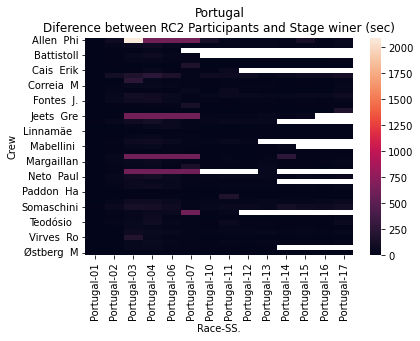

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC2 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

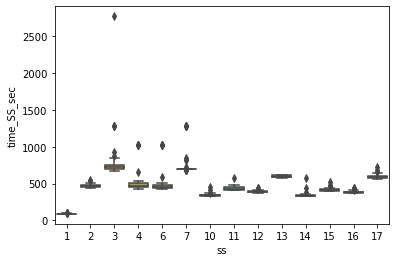

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

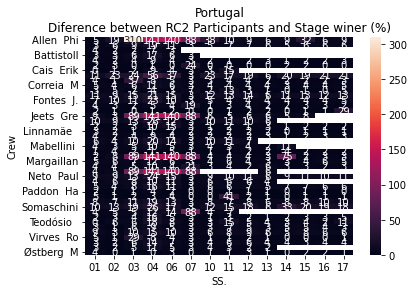

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC2 Participants and Stage winer (%)')
plt.savefig("Rc2.jpg")